# Hyperparameter Finetuning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/dffinal.csv",index_col=0)
df.head()

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito,log_weekly_sales
1,16,0,154.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.098612
2,60,0,154.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4.812184
3,50,0,154.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,4.779123
4,60,0,154.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1.945910
5,18,0,154.0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,3.555348


In [3]:
df.shape

(9951, 18)

In [4]:
df.isnull().sum()

weekly_transactions                    0
National_Ecuador_weekly_additionals    0
oil_weekly_max                         0
item_nbr_695758                        0
item_nbr_699745                        0
item_nbr_741201                        0
item_nbr_1110679                       0
item_nbr_1247036                       0
onpromotion_0                          0
onpromotion_1                          0
store_nbr_46                           0
store_nbr_47                           0
store_nbr_48                           0
WW_2                                   0
item_class_2802                        0
item_class_2850                        0
city_Quito                             0
log_weekly_sales                       0
dtype: int64

In [5]:
df.dtypes

weekly_transactions                      int64
National_Ecuador_weekly_additionals      int64
oil_weekly_max                         float64
item_nbr_695758                          int64
item_nbr_699745                          int64
item_nbr_741201                          int64
item_nbr_1110679                         int64
item_nbr_1247036                         int64
onpromotion_0                            int64
onpromotion_1                            int64
store_nbr_46                             int64
store_nbr_47                             int64
store_nbr_48                             int64
WW_2                                     int64
item_class_2802                          int64
item_class_2850                          int64
city_Quito                               int64
log_weekly_sales                       float64
dtype: object

In [6]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [8]:
X_train = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_X_train.csv",index_col=0)
#X_train.drop('Unnamed: 0', inplace=True, axis=1)
X_train.shape

(7960, 17)

In [9]:
X_train.head()

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
2255,212,1,190,1,0,0,0,0,0,1,0,0,0,0,1,0,0
6859,218,1,68,0,1,0,0,0,0,1,0,0,1,0,1,0,1
1833,515,1,206,0,0,0,0,1,1,0,0,0,1,0,0,0,1
3797,836,1,86,0,0,0,0,1,1,0,0,1,0,0,0,0,1
7239,189,1,34,0,0,0,1,0,1,0,0,0,1,0,0,1,1


In [10]:
X_test = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_X_test.csv",index_col=0)
#X_test.drop('Unnamed: 0', inplace=True, axis=1)
X_test.shape

(1991, 17)

In [11]:
X_test.head()

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
3,50,1,155,0,1,0,0,0,0,0,0,1,0,0,1,0,1
4,60,1,155,0,0,0,0,0,0,0,1,0,0,0,0,1,1
12,16,1,155,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23,305,1,160,0,0,0,0,0,0,0,0,0,1,1,0,0,1
24,116,1,160,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
y_train = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_y_train.csv",index_col=0)
y_test = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_y_test.csv",index_col=0)

In [13]:
y_train = y_train['x']
y_test = y_test['x']

In [14]:
y_train.shape

(7960,)

In [15]:
y_test.shape

(1991,)

## Get train original (064) and run predictive model as reference (base model)

In [16]:
X_train_064 = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/X_train_064.csv",index_col=0)

In [17]:
X_train_064.head()

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
7094,438,1,85,0,0,0,1,0,1,0,1,0,0,0,0,1,1
1989,240,1,206,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4078,624,1,128,0,0,0,0,1,1,0,1,0,0,0,0,0,1
2476,618,1,167,0,0,0,0,1,1,0,1,0,0,0,0,0,1
8229,925,1,110,1,0,0,0,0,0,1,0,1,0,0,1,0,1


In [18]:
y_train_064 = pd.read_csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/y_train_064.csv",index_col=0)

In [19]:
y_train_064 = y_train_064['x']
y_train_064.shape

(6368,)

In [20]:
#from sklearn.ensemble import RandomForestRegressor 
mod4 = RandomForestRegressor(random_state = 3)
mod4.fit(X_train_064, y_train_064)
y_pred_train_064 = mod4.predict(X_train_064)

#print('MAE: ', mean_absolute_error(y_train_064, y_pred_064))
#print('MSE: ', mean_squared_error(y_train_064, y_pred_064))

rmse = mean_squared_error(y_train_064, y_pred_train_064, squared=False)
rmsle = mean_squared_log_error(y_train_064, y_pred_train_064)
print('Model Performance')
print('Root Mean Squared Error: {:0.3f}'.format(rmse))
print('Root Mean Squared Log Error: {:0.4f}'.format(rmsle))


Model Performance
Root Mean Squared Error: 0.197
Root Mean Squared Log Error: 0.0037


In [21]:
y_pred_test = mod4.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmsle = mean_squared_log_error(y_test, y_pred_test)
print('Model Performance')
print('Root Mean Squared Error: {:0.3f}'.format(rmse))
print('Root Mean Squared Log Error: {:0.4f}'.format(rmsle))

Model Performance
Root Mean Squared Error: 0.531
Root Mean Squared Log Error: 0.0237


In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    rmsle = mean_squared_log_error(test_labels, predictions)
    print('Model Performance')
    print('Root Mean Squared Error: {:0.3f}'.format(rmse))
    print('Root Mean Squared Log Error: {:0.4f}'.format(rmsle))
    return rmse

In [23]:
base_accuracy = evaluate(mod4, X_test, y_test)

Model Performance
Root Mean Squared Error: 0.531
Root Mean Squared Log Error: 0.0237


## Feature importance

In [25]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [26]:
importances = list(zip(mod4.feature_importances_, df.columns))
importances.sort(reverse=True)

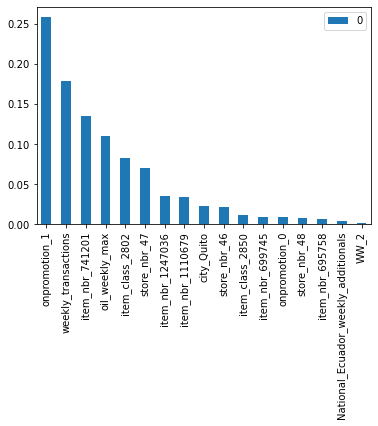

In [27]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

## Random Search: we decide which parameters and how (randomly)

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}


In [28]:
rf = RandomForestRegressor(random_state = 3)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose=2, random_state = 42, n_jobs = -1)

In [29]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 775,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [31]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    rmsle = mean_squared_log_error(test_labels, predictions)
    print('Model Performance')
    print('Root Mean Squared Error: {:0.3f}'.format(rmse))
    print('Root Mean Squared Log Error: {:0.4f}'.format(rmsle))
    return rmse

##  Best grid


In [32]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Root Mean Squared Error: 0.510
Root Mean Squared Log Error: 0.0221


In [33]:
best_random_train = rf_random.best_estimator_
random_accuracy_train = evaluate(best_random_train, X_train_064, y_train_064)

Model Performance
Root Mean Squared Error: 0.422
Root Mean Squared Log Error: 0.0164


In [34]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 4.04%.


## Grid search: we decide which parameters and how (not randomly)

In [35]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 8, 10, 12, 15],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [600, 700, 800]
}

# Create a based model
rf = RandomForestRegressor(random_state = 3)
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

##### Fit the grid search to the data

In [36]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 8, 10, 12, 15],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [600, 700, 800]},
             verbose=2)

In [37]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 600}

## Final model

In [38]:
Fine_Tuned_Model = grid_search.best_estimator_
grid_accuracy = evaluate(Fine_Tuned_Model, X_test, y_test)

Model Performance
Root Mean Squared Error: 0.510
Root Mean Squared Log Error: 0.0221


In [39]:
print('Improvement in reference to the base model {:0.2f}%.'.format( 100 * (base_accuracy - grid_accuracy) / base_accuracy))
print('Improvement in reference to the best grid model {:0.2f}%.'.format( 100 * (random_accuracy - grid_accuracy) / random_accuracy))

Improvement in reference to the base model 4.07%.
Improvement in reference to the best grid model 0.04%.


In [40]:
Fine_Tuned_Model_train = rf_random.best_estimator_
random_accuracy = evaluate(Fine_Tuned_Model_train, X_train_064, y_train_064)

Model Performance
Root Mean Squared Error: 0.422
Root Mean Squared Log Error: 0.0164


In [41]:
predictions = Fine_Tuned_Model.predict(X_test) 

In [42]:
y_train

1       1.098612
2       2.302585
3       3.295837
4       3.610918
5       2.772589
          ...   
7956    1.098612
7957    3.218876
7958    3.178054
7959    2.944439
7960    3.091042
Name: x, Length: 7960, dtype: float64

In [43]:
y_test_pred = pd.DataFrame(predictions)
y_test_pred.columns = ['Log_weekly_sales_pred']

In [44]:
y_test_pred

,Log_weekly_sales_pred
0,3.660758
1,2.629927
2,3.125657
3,2.651412
4,1.825115
...,...
1986,4.673823
1987,2.776127
1988,2.006689
1989,3.264253


In [45]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Log_weekly_sales']
y_test

,Log_weekly_sales
1,4.779123
2,1.945910
3,3.610918
4,3.663562
5,1.609438
...,...
1987,4.025352
1988,2.484907
1989,2.079442
1990,3.688879


In [46]:
X_test = pd.DataFrame(X_test)
#y_test.columns = ['Log_weekly_sales']
X_test

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
3,50,1,155,0,1,0,0,0,0,0,0,1,0,0,1,0,1
4,60,1,155,0,0,0,0,0,0,0,1,0,0,0,0,1,1
12,16,1,155,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23,305,1,160,0,0,0,0,0,0,0,0,0,1,1,0,0,1
24,116,1,160,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,12,1,72,0,0,1,0,0,1,0,1,0,0,0,0,0,1
9939,6,1,72,0,0,0,1,0,1,0,0,0,0,0,0,1,0
9940,12,1,72,0,0,0,0,0,1,0,1,0,0,0,0,1,1
9944,14,1,72,0,1,0,0,0,1,0,0,1,0,0,1,0,1


In [47]:
result = pd.concat([y_test, y_test_pred, X_test], axis=1)

In [48]:
result

,Log_weekly_sales,Log_weekly_sales_pred,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
0,NaN,3.660758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.779123,2.629927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.945910,3.125657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.610918,2.651412,50.0,1.0,155.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,3.663562,1.825115,60.0,1.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,NaN,NaN,12.0,1.0,72.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9939,NaN,NaN,6.0,1.0,72.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9940,NaN,NaN,12.0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
9944,NaN,NaN,14.0,1.0,72.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [49]:
y_test_pred.to_csv (r'C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/y_test_pred.csv', index = False, header=True)